In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

file_path = '/content/drive/MyDrive/diabetes_data_upload.csv'
df = pd.read_csv(file_path)

In [ ]:

df.head(1000)

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       1         0           1                   0         1   
1     58       1         0           0                   0         1   
2     41       1         1           0                   0         1   
3     45       1         0           0                   1         1   
4     60       1         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       0         1           1                   1         0   
516   48       0         1           1                   1         1   
517   58       0         1           1                   1         1   
518   32       0         0           0                   0         1   
519   42       1         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0               0                0        1             0   
1             0               0                1        0             0   
2             1               0                0        1             0   
3             1               1                0        1             0   
4             1               0                1        1             1   
..          ...             ...              ...      ...           ...   
515           1               0                0        1             0   
516           1               0                0        1             1   
517           1               0                1        0             0   
518           0               0                1        1             0   
519           0               0                0        0             0   

     delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                  1                0                 1         1        1   
1                  0                1                 0         1        0   
2                  1                0                 1         1        0   
3                  1                0                 0         0        0   
4                  1                1                 1         1        1   
..               ...              ...               ...       ...      ...   
515                1                1                 0         0        0   
516                1                1                 0         0        0   
517                0                1                 1         0        1   
518                1                0                 0         1        0   
519                0                0                 0         0        0   

     class  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
515      1  
516      1  
517      1  
518      0  
519      0  

[520 rows x 17 columns]

In [ ]:

df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

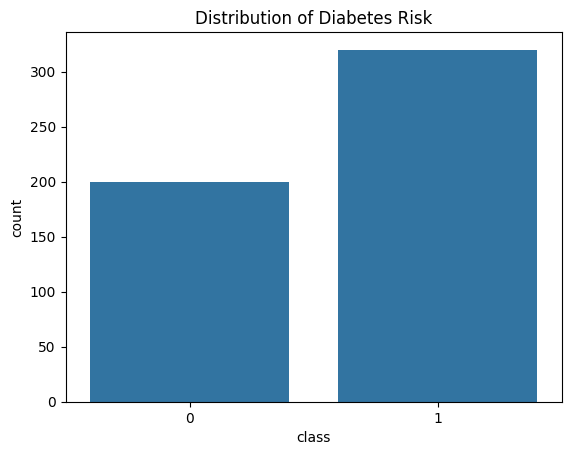

In [ ]:
# Plot the distribution of the target variable
sns.countplot(x='class', data=df)
plt.title('Distribution of Diabetes Risk')
plt.show()

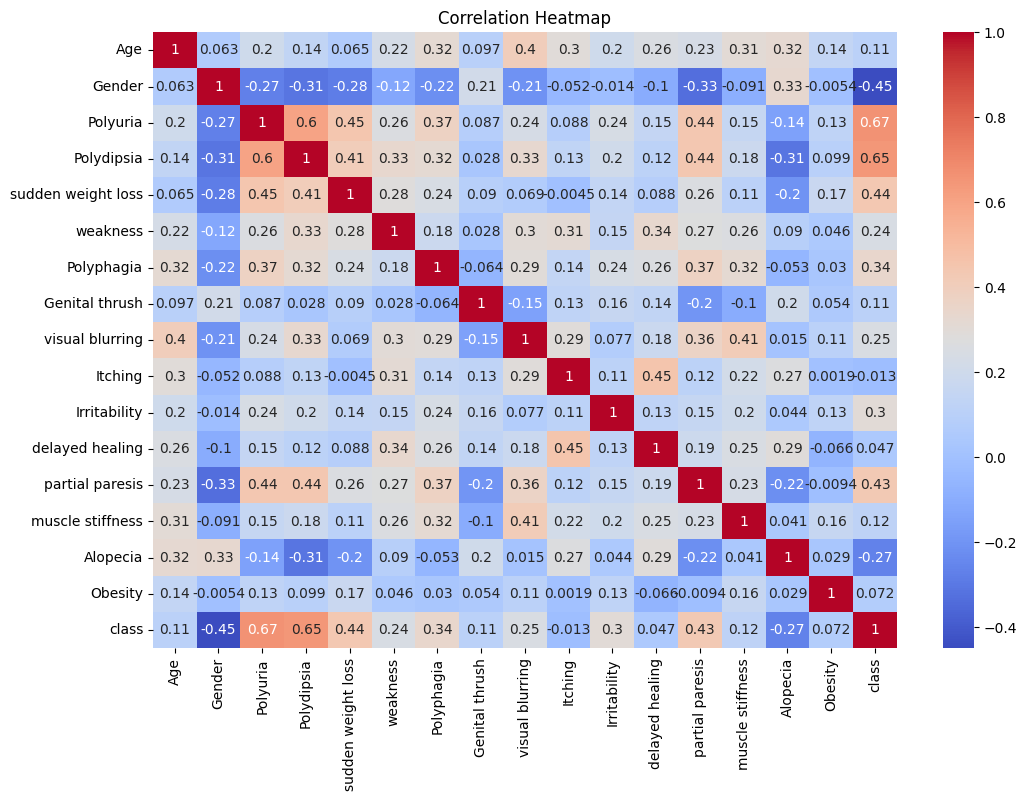

In [ ]:
# Create a correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Sử dụng logistic_regesstion (Không chuẩn hoá dữ liệu, thực hiện train
trên dữ liệu nhị phân)



In [ ]:
df_lr = df
X = df_lr.drop('class', axis=1)
y = df_lr['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



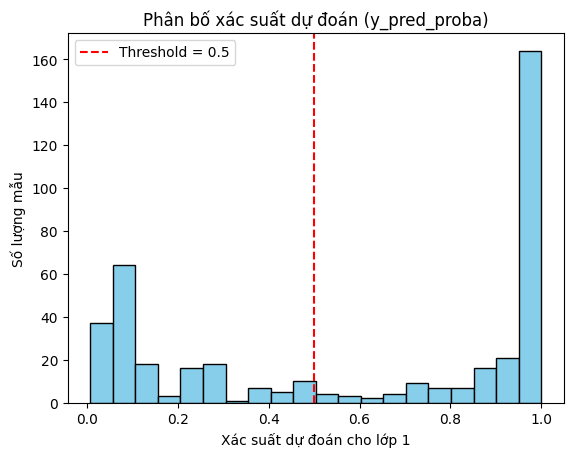

In [ ]:
y_pred = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
class_report_lr = classification_report(y_test, y_pred)

print(class_report_lr)

y_pred_proba = model_lr.predict_proba(X_train)[:, 1]

# Vẽ biểu đồ phân bố xác suất dự đoán
plt.hist(y_pred_proba, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')  # Vẽ ngưỡng mặc định
plt.title('Phân bố xác suất dự đoán (y_pred_proba)')
plt.xlabel('Xác suất dự đoán cho lớp 1')
plt.ylabel('Số lượng mẫu')
plt.legend()
plt.show()

Sử dụng logistic_regesstion (Chuẩn hoá dữ liệu, đưa về phân phối chuẩn)



In [ ]:
df_lr_scaler = df
X = df_lr_scaler.drop('class', axis=1)
y = df_lr_scaler['class']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model_lr_scaler = LogisticRegression(solver = "liblinear")
model_lr_scaler.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = model_lr_scaler.predict(X_test)
accuracy_lr_scaler = accuracy_score(y_test, y_pred)
conf_matrix_lr_scaler = confusion_matrix(y_test, y_pred)
class_report_lr_scaler = classification_report(y_test, y_pred)

print(class_report_lr_scaler)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.94      0.96      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.92      0.92       104
weighted avg       0.93      0.93      0.93       104



Sử dụng decision_tree

In [ ]:
df_dt = df
X = df_dt.drop('class', axis=1)
y = df_dt['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

chiều cao cây bằng 3
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



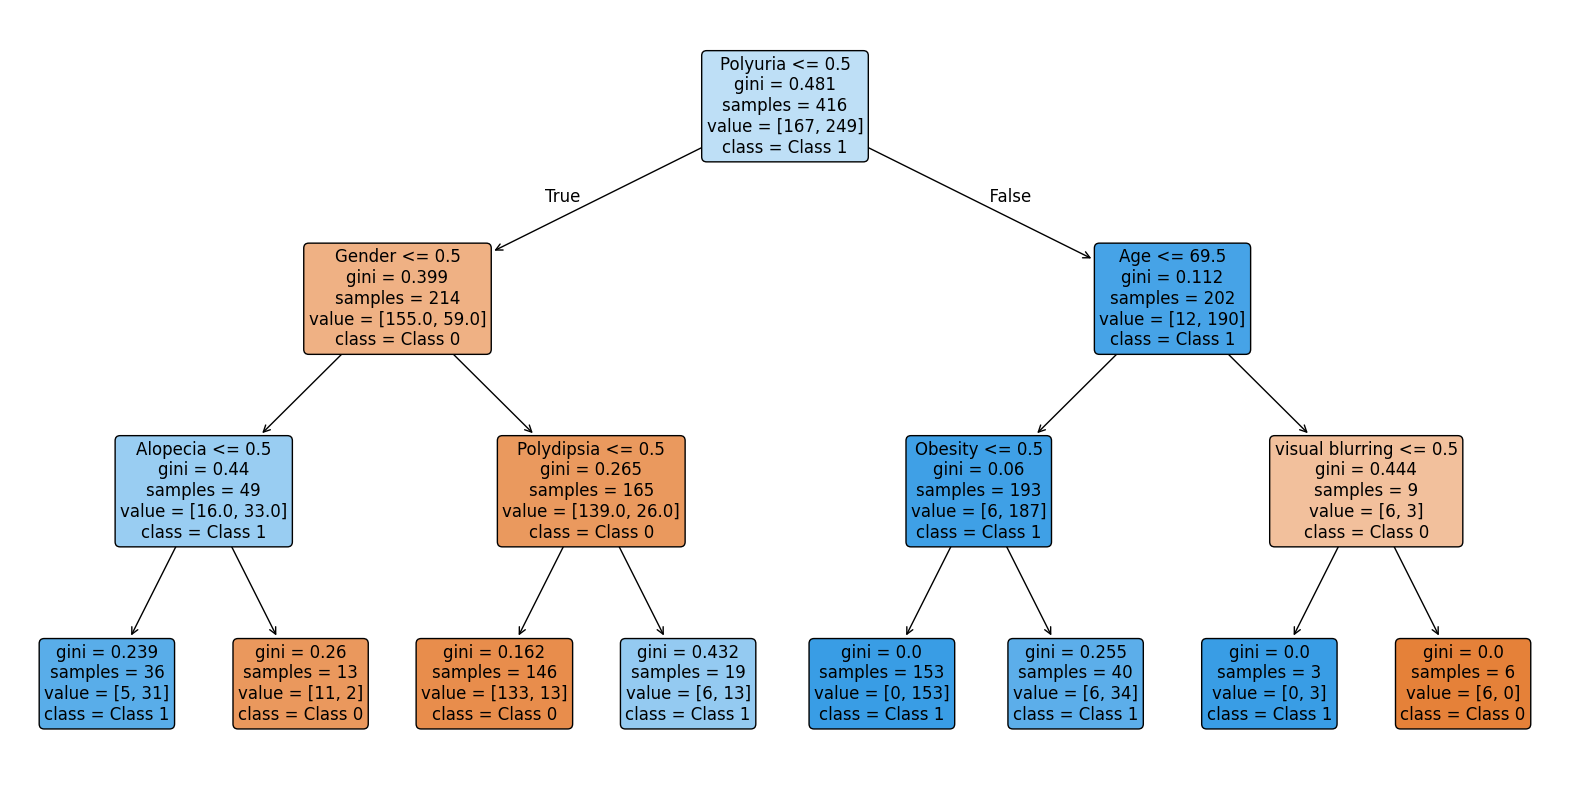

----------------------------------
chiều cao cây bằng 4
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.97      0.92      0.94        71

    accuracy                           0.92       104
   macro avg       0.90      0.93      0.91       104
weighted avg       0.93      0.92      0.92       104



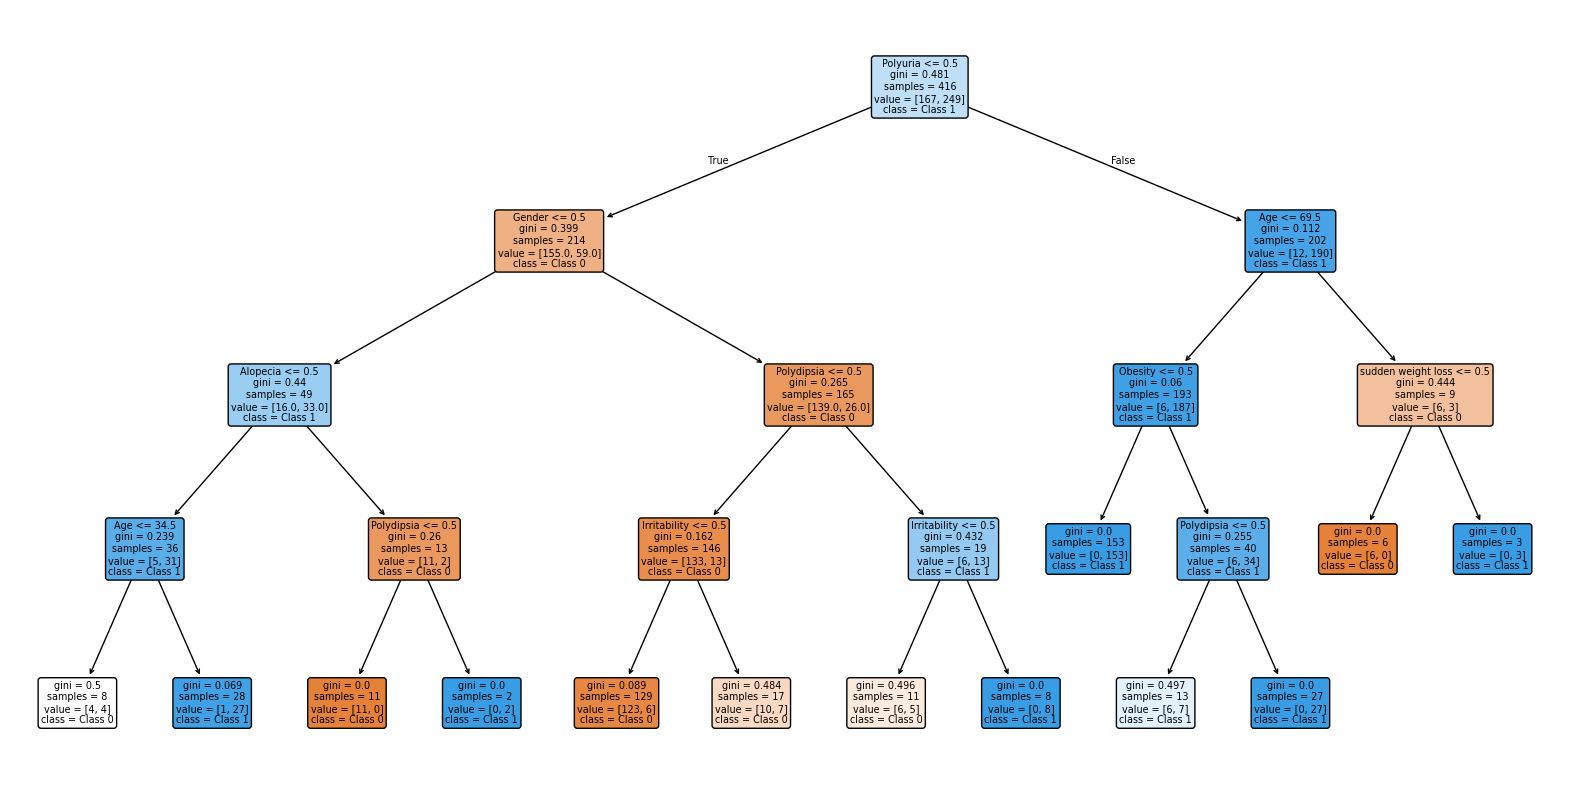

----------------------------------
chiều cao cây bằng 5
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



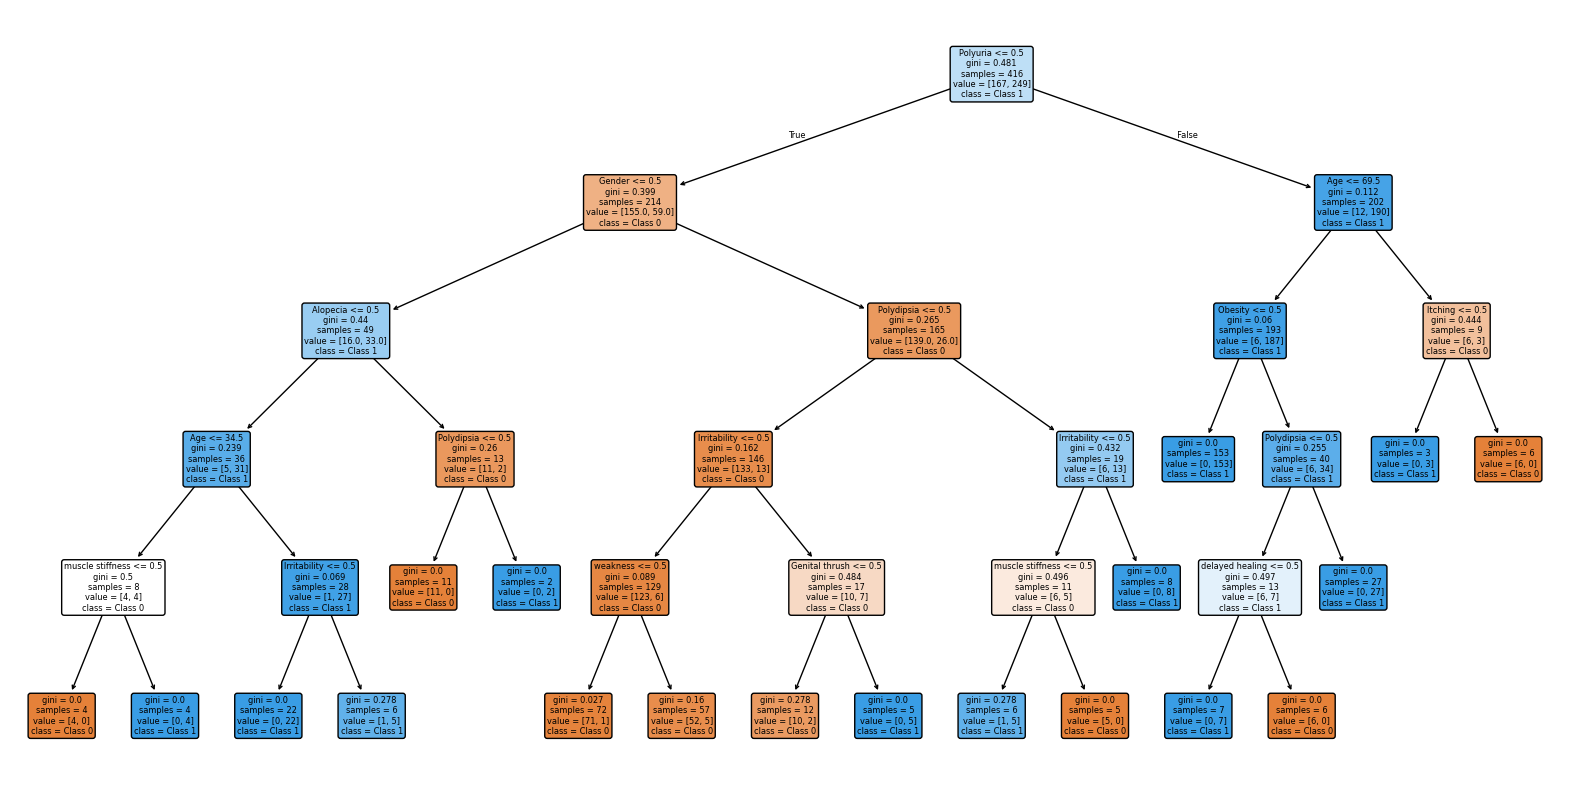

----------------------------------
chiều cao cây bằng 6
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.92      0.96        71

    accuracy                           0.94       104
   macro avg       0.92      0.96      0.94       104
weighted avg       0.95      0.94      0.94       104



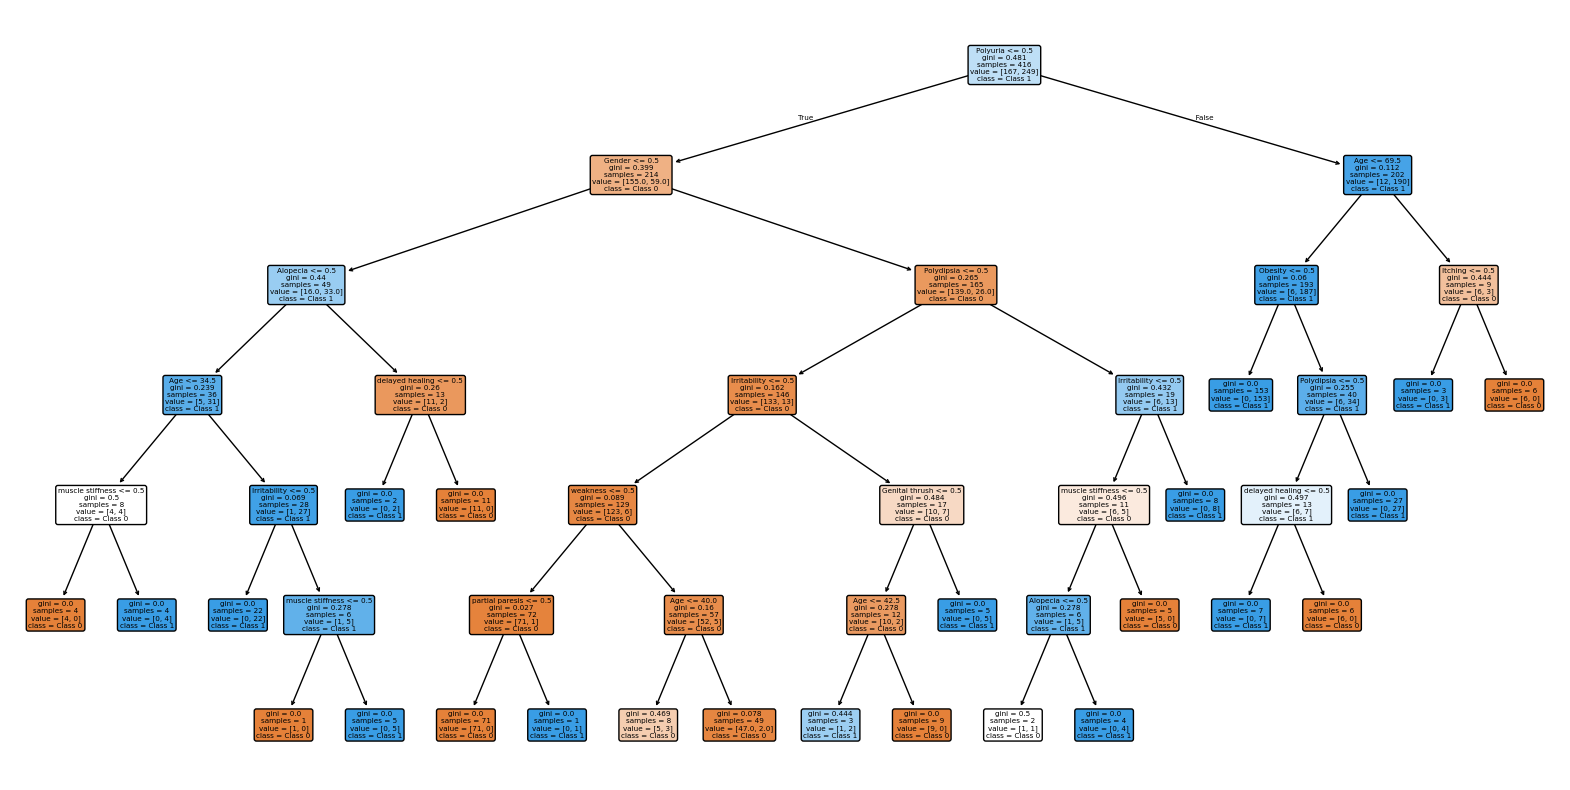

----------------------------------
chiều cao cây bằng 7
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.94      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104



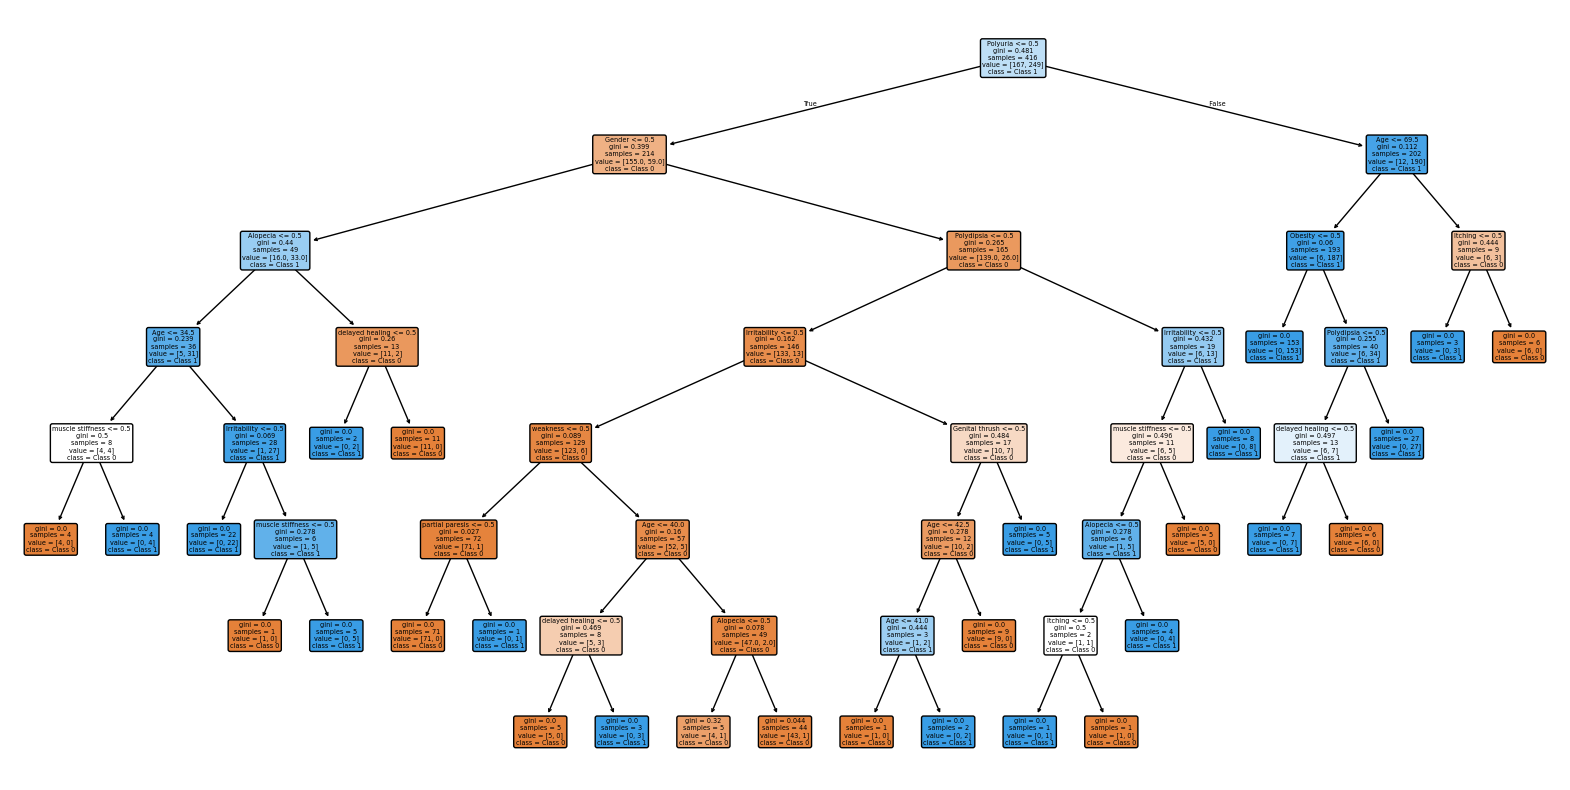

----------------------------------
chiều cao cây bằng 8
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



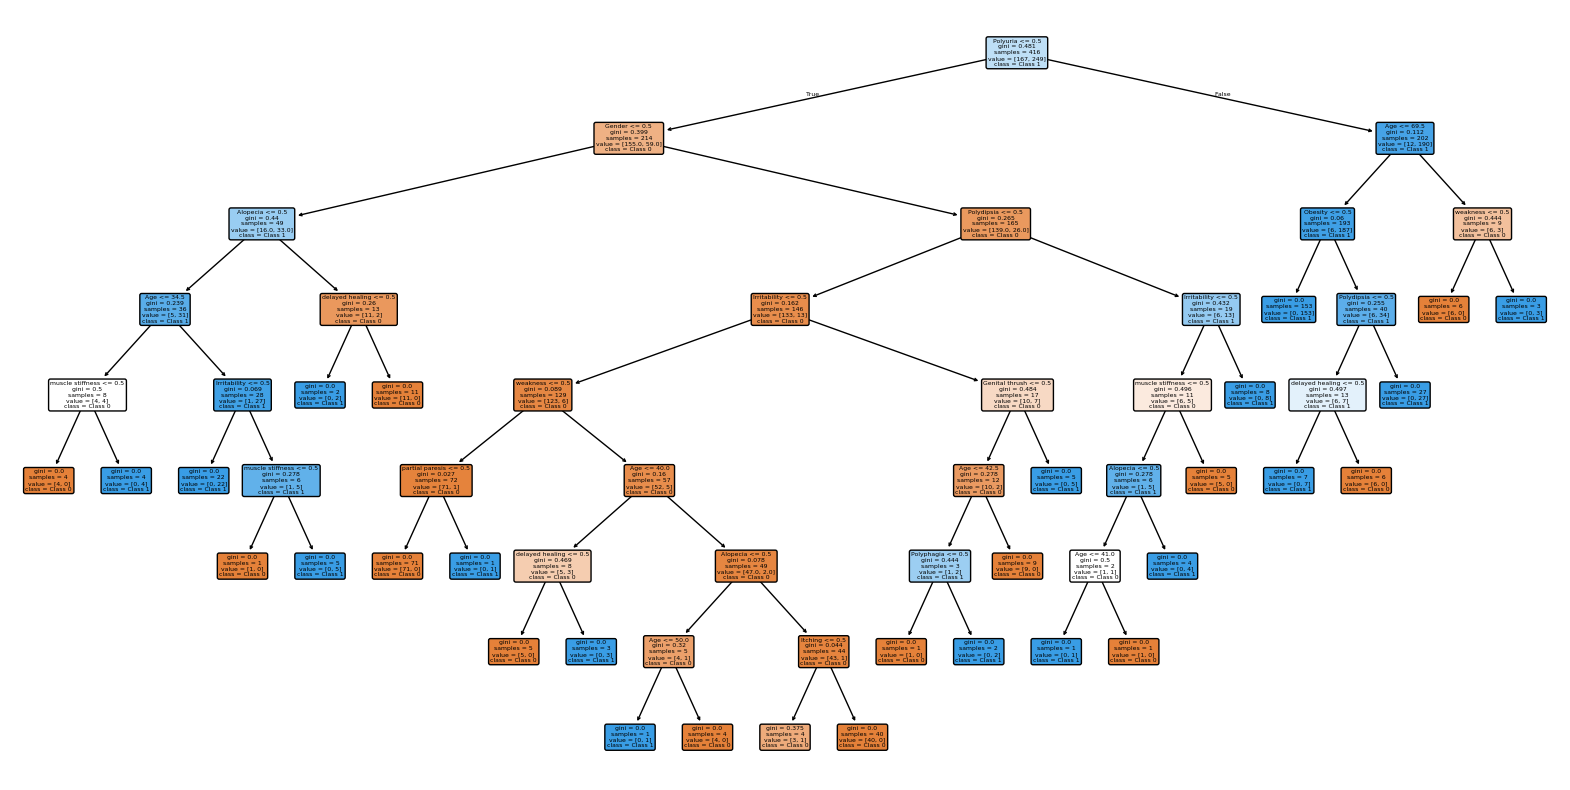

----------------------------------
chiều cao cây bằng 9
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



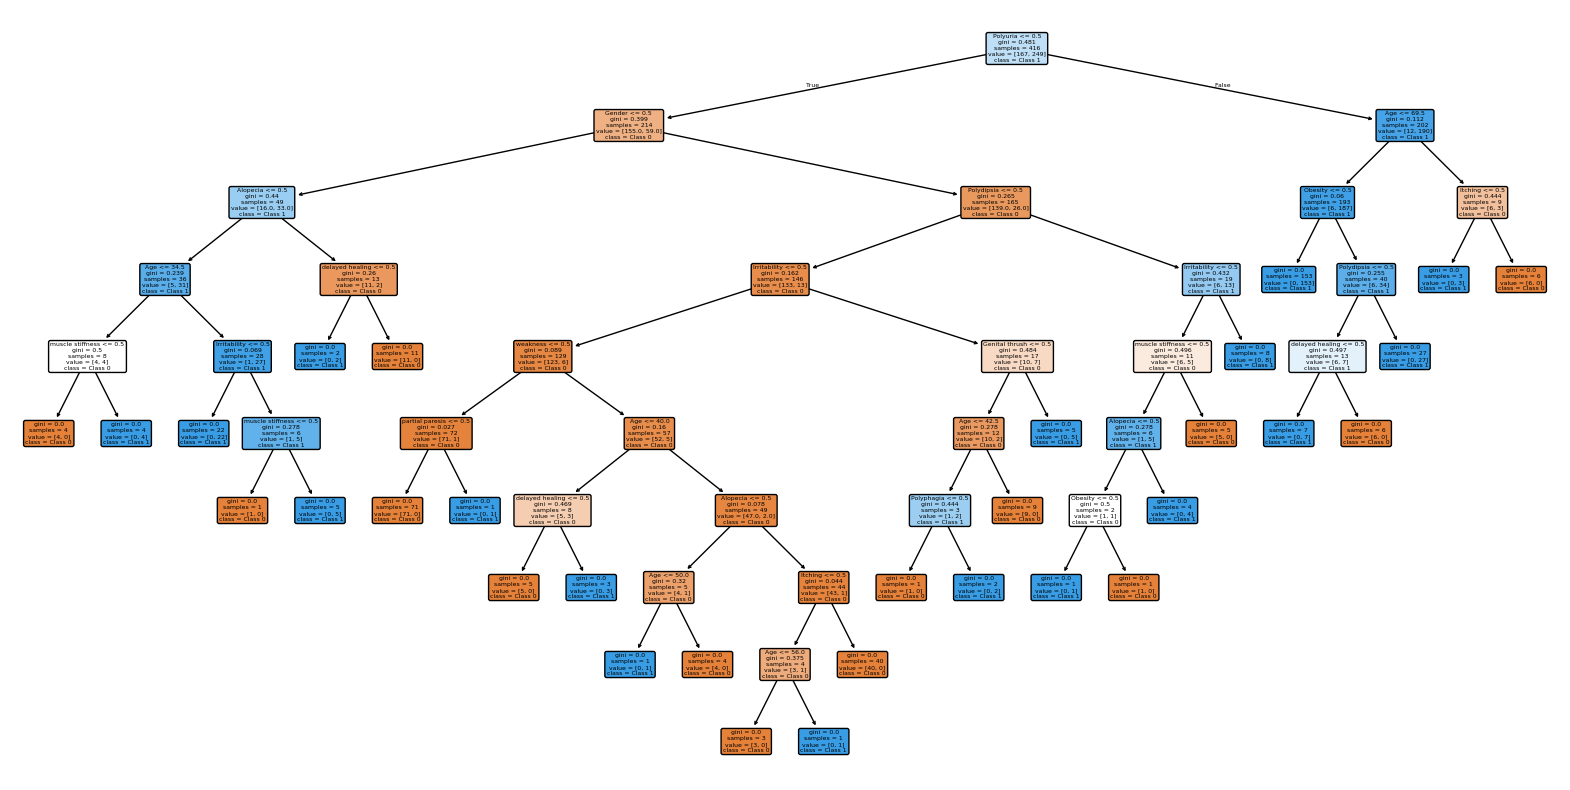

----------------------------------
chiều cao cây bằng 10
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



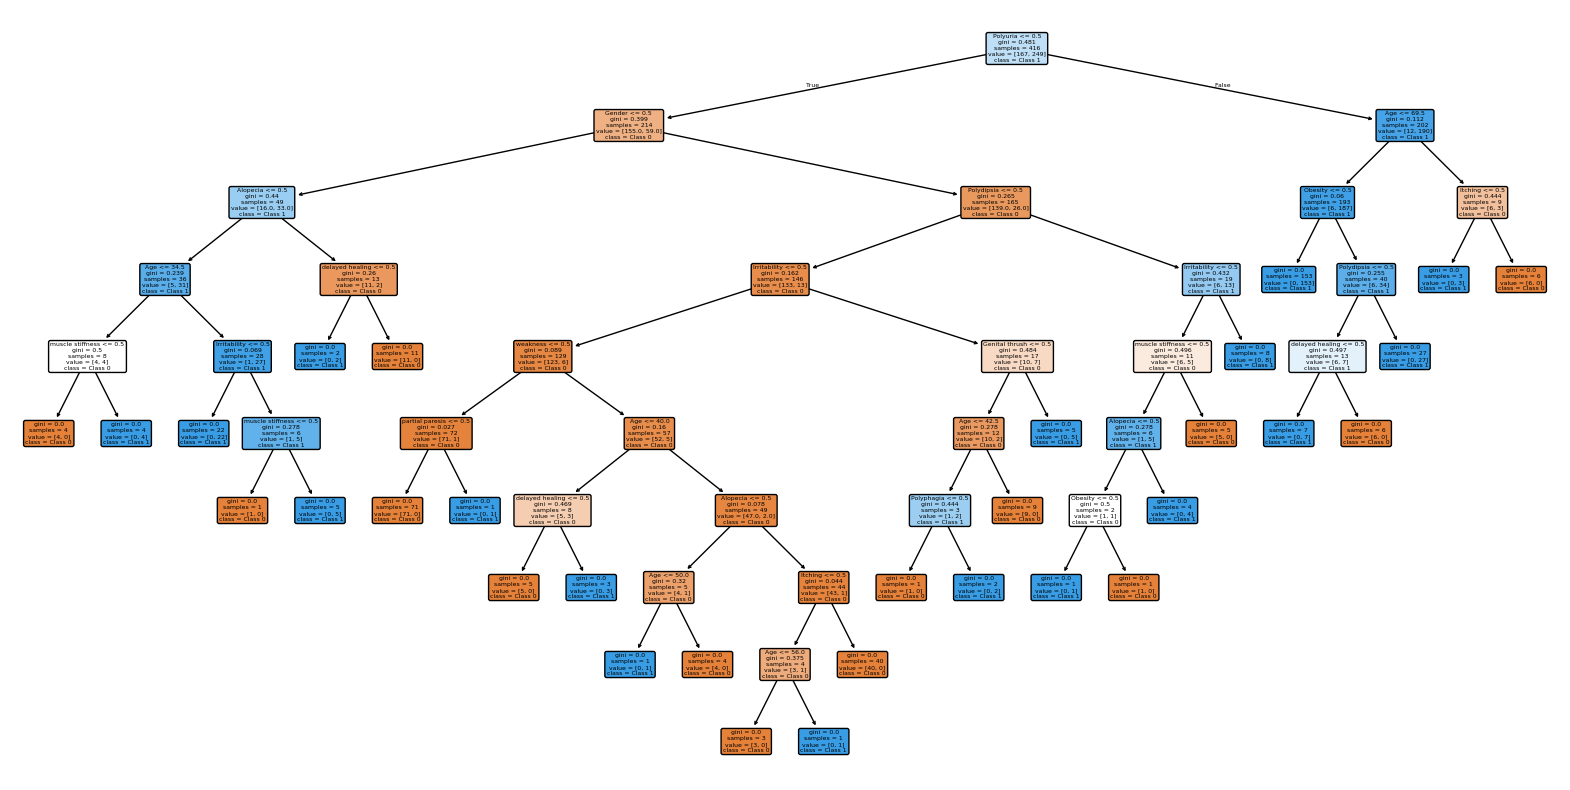

----------------------------------
chiều cao cây bằng 11
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



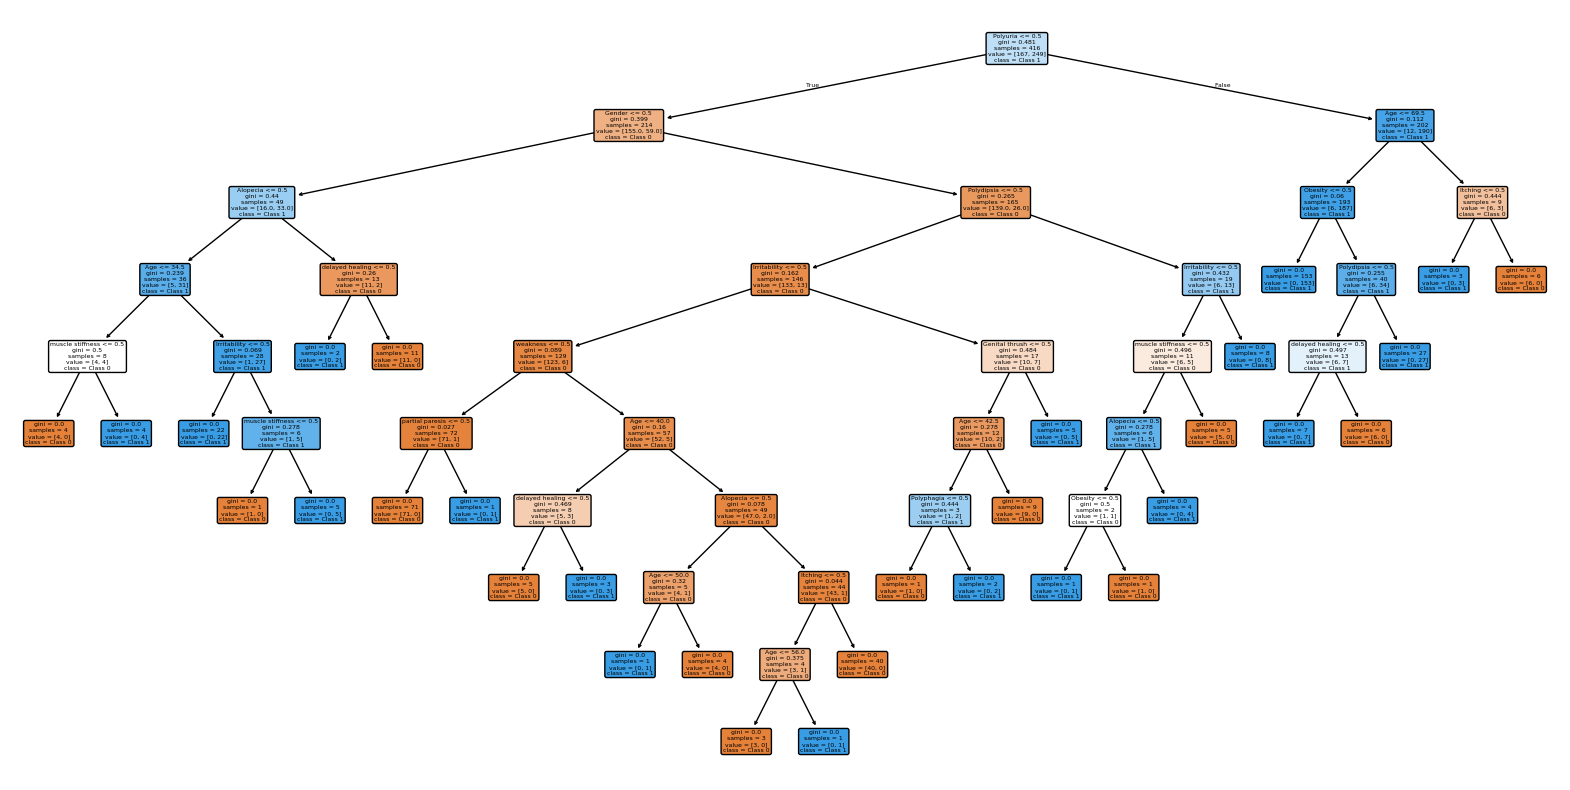

----------------------------------
chiều cao cây bằng 12
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



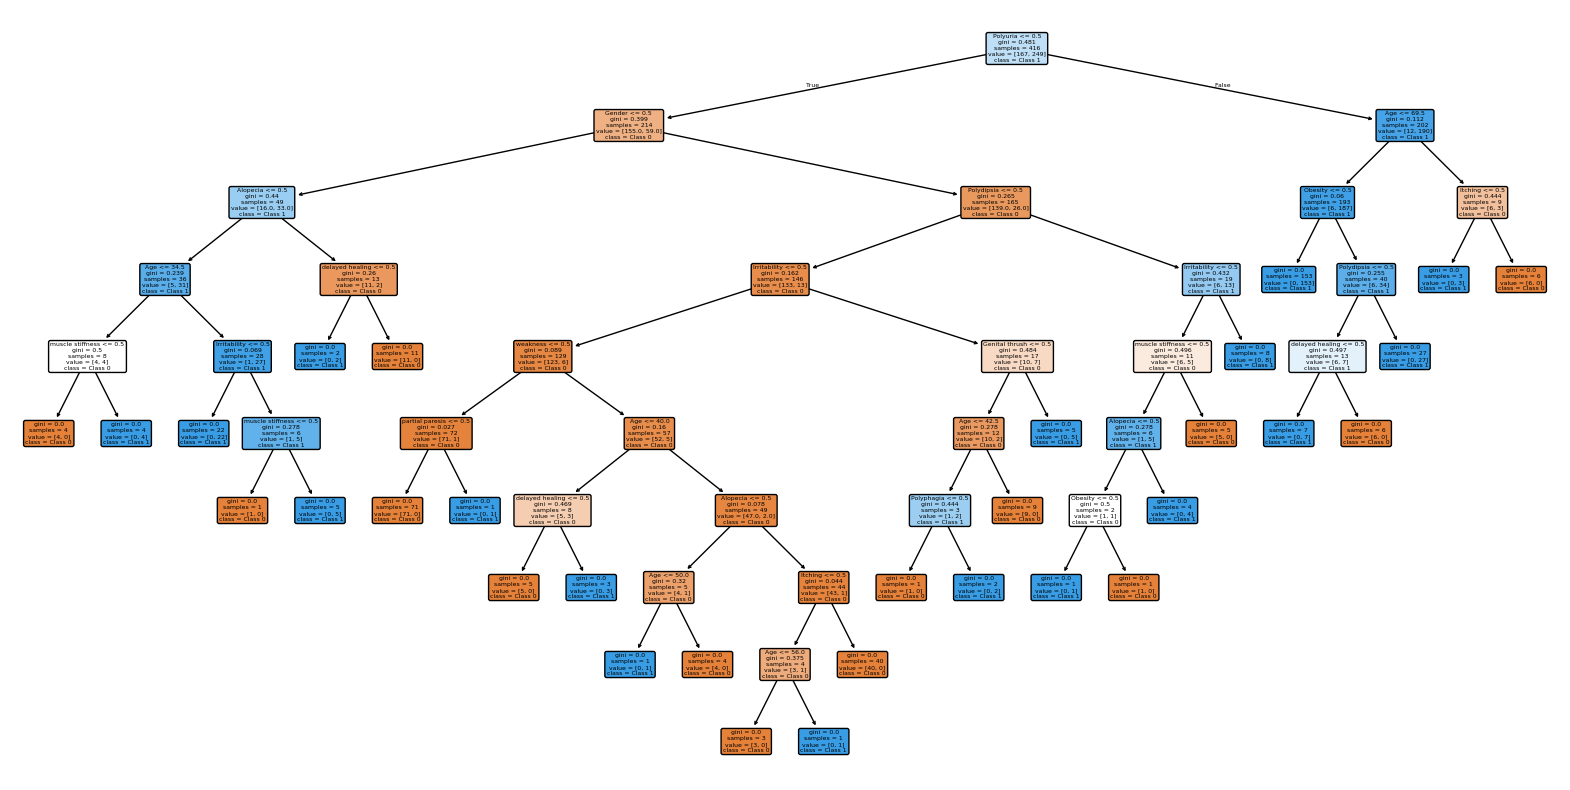

----------------------------------
chiều cao cây bằng 13
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



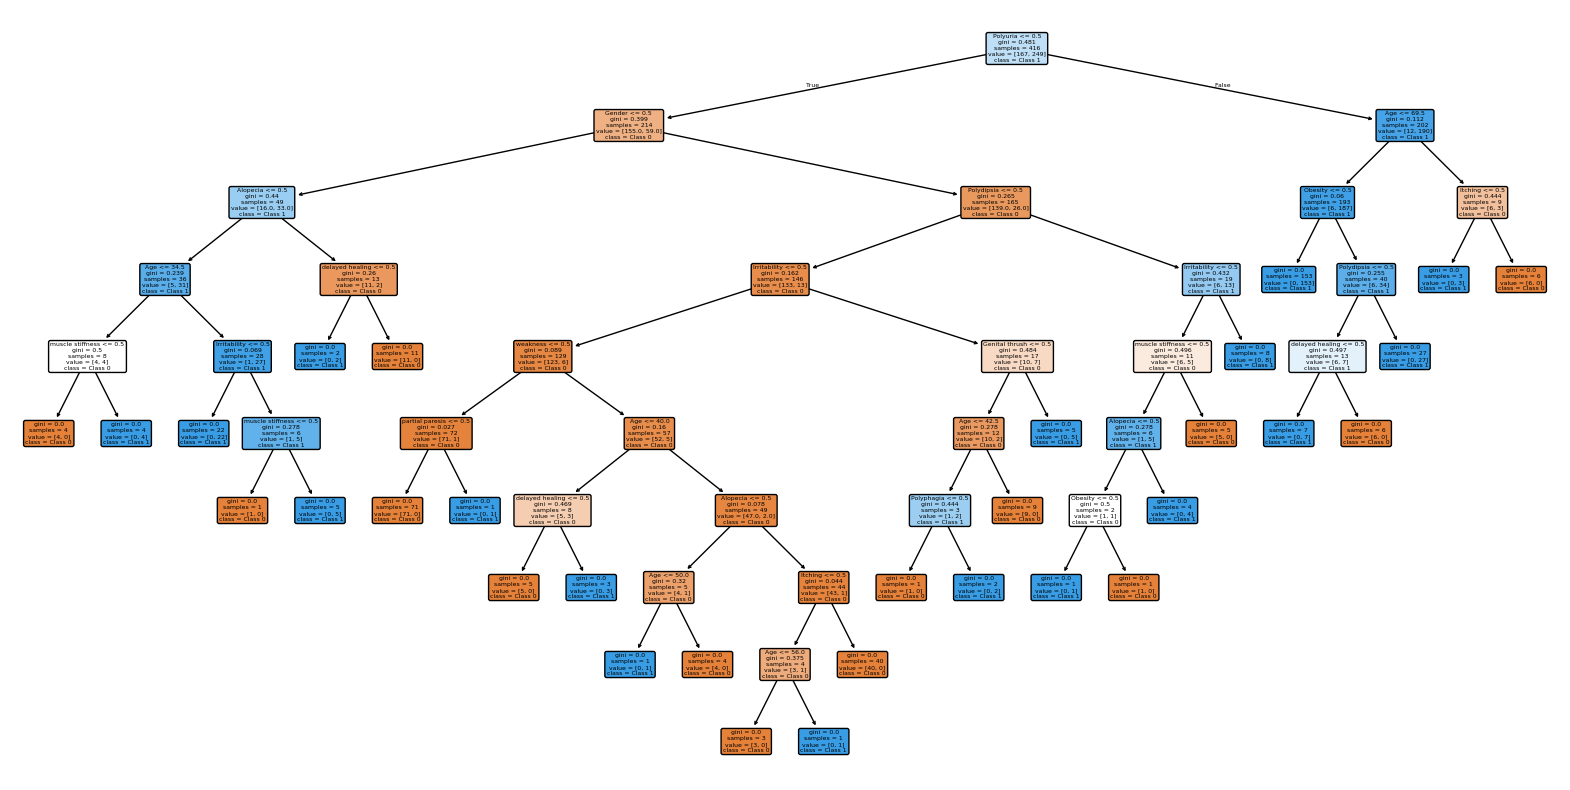

----------------------------------
chiều cao cây bằng 14
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



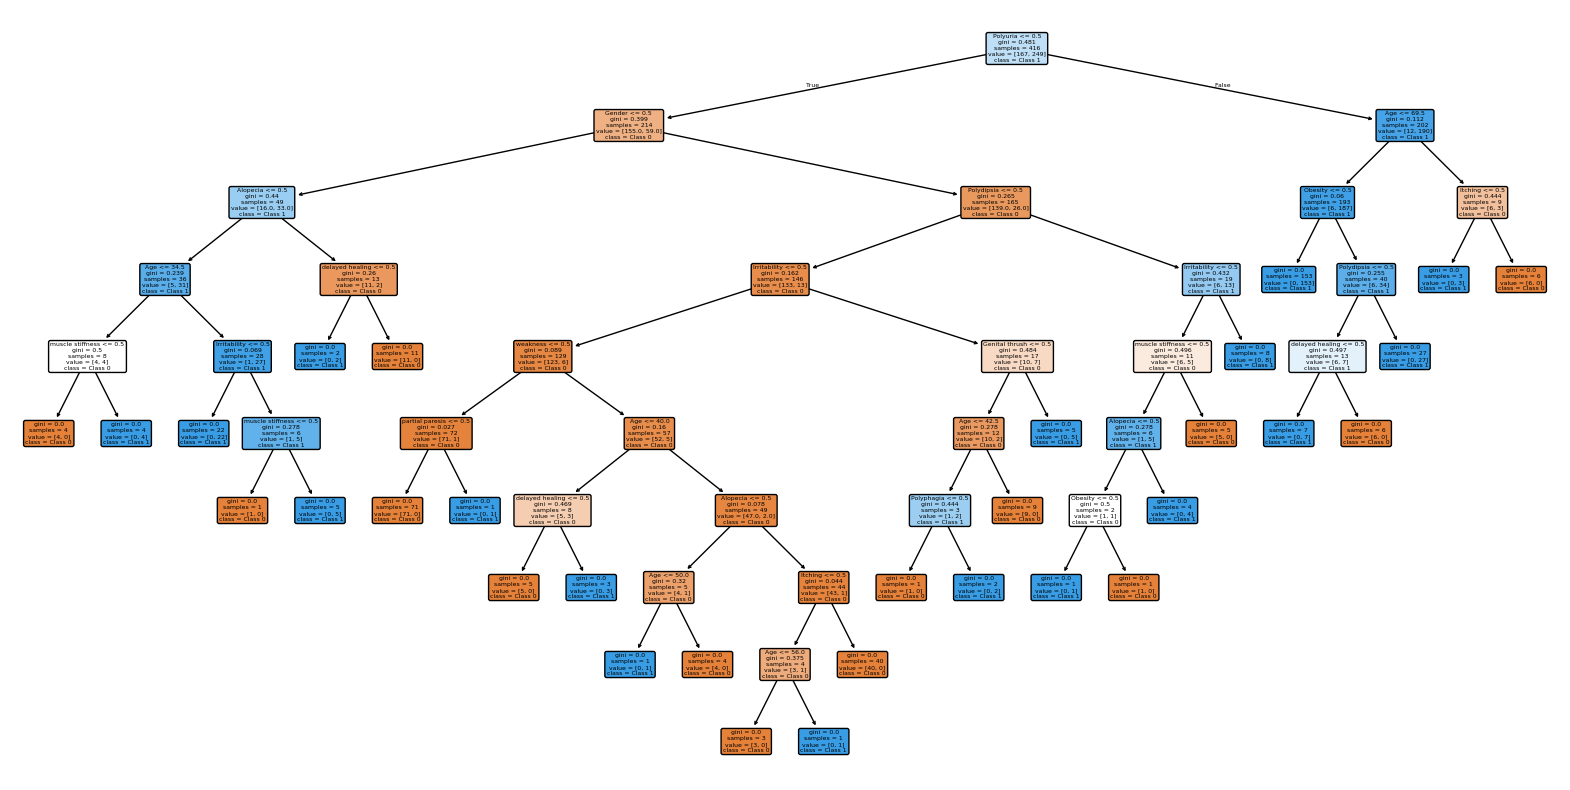

----------------------------------
chiều cao cây bằng 15
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



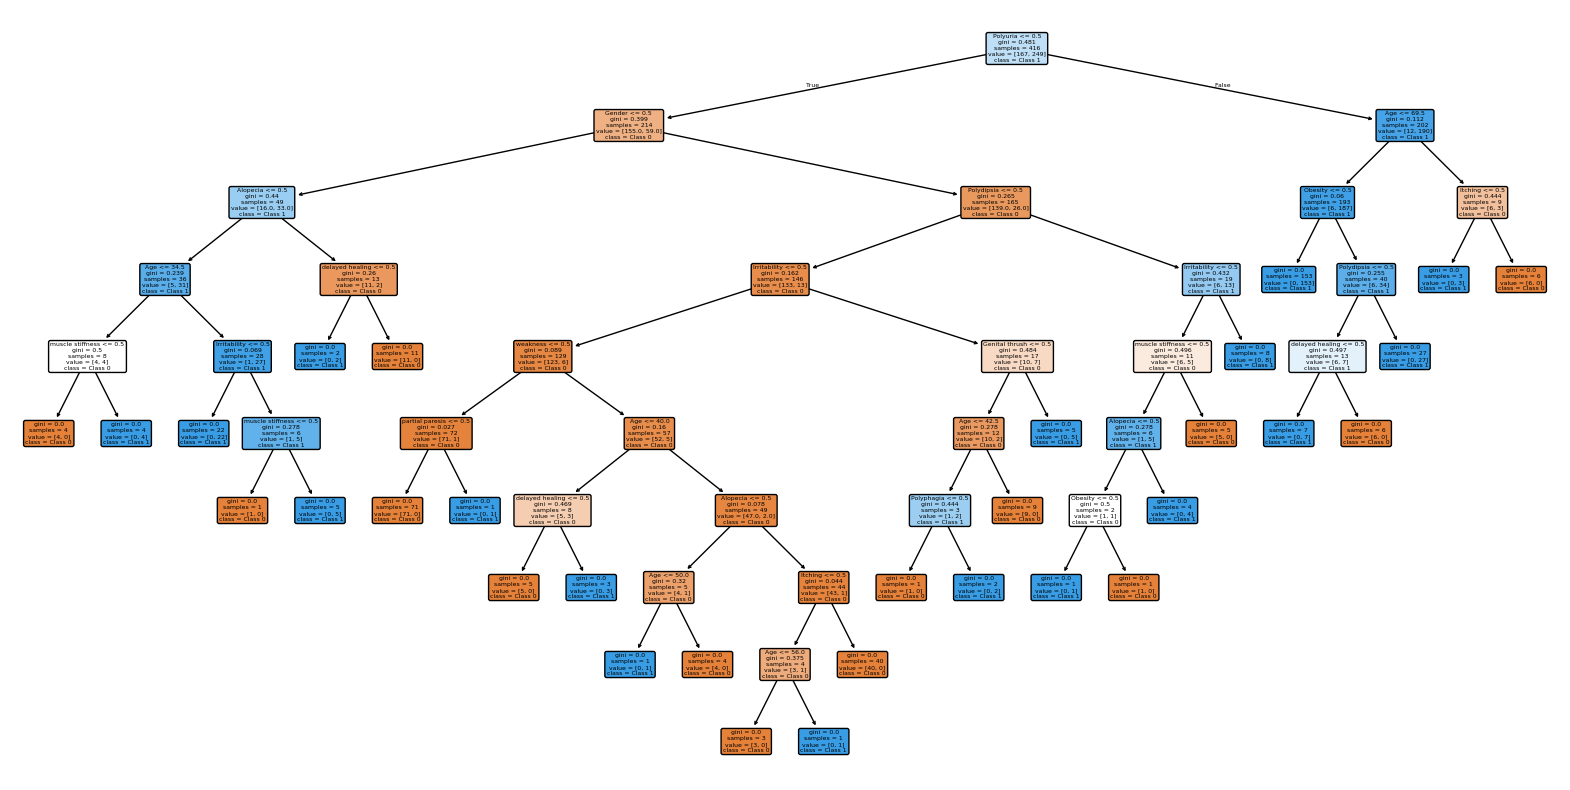

----------------------------------
chiều cao cây bằng 16
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



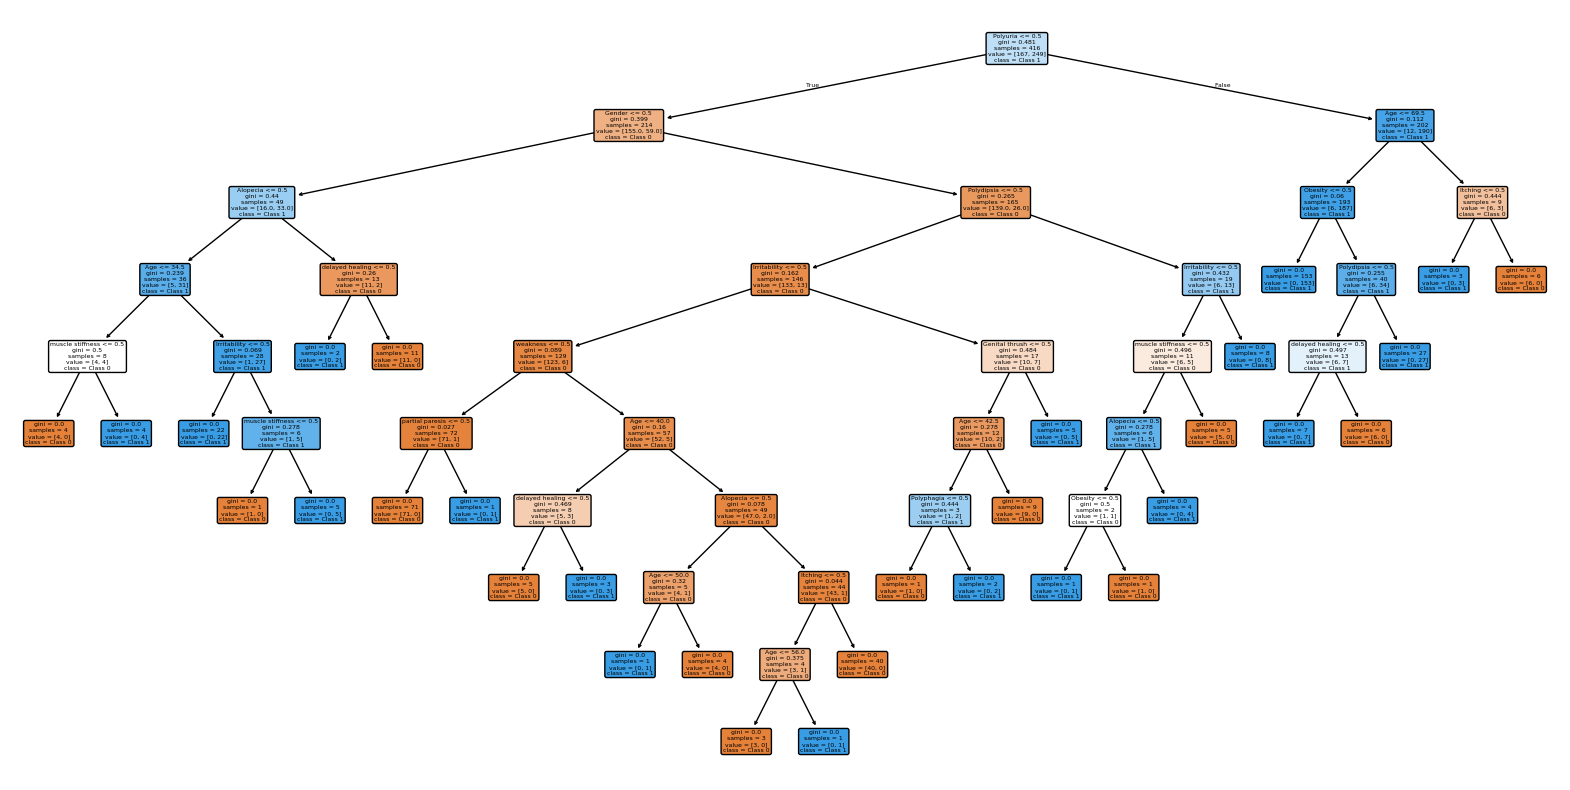

----------------------------------
chiều cao cây bằng 17
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



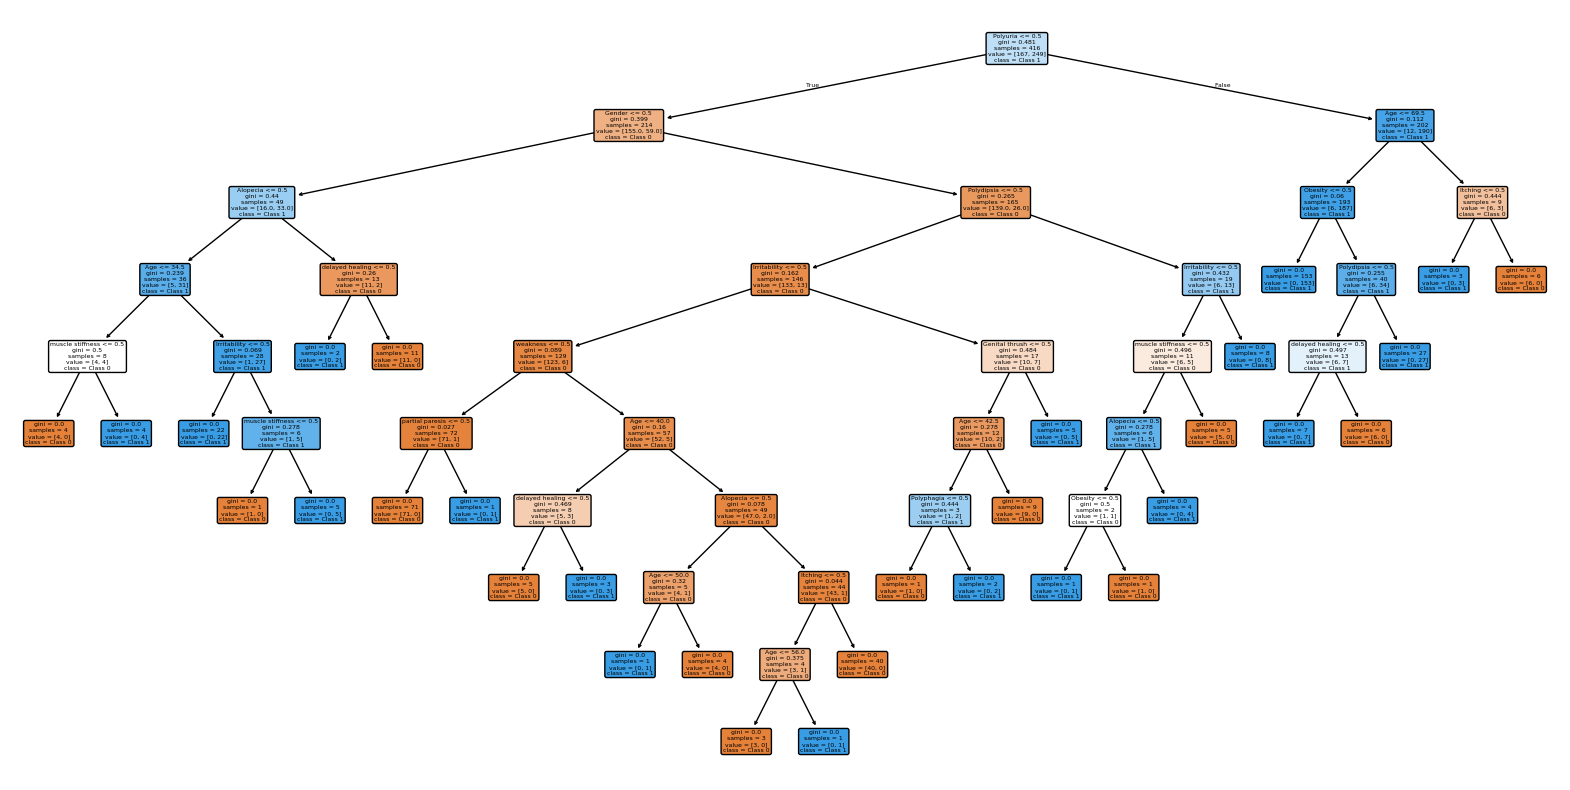

----------------------------------
chiều cao cây bằng 18
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



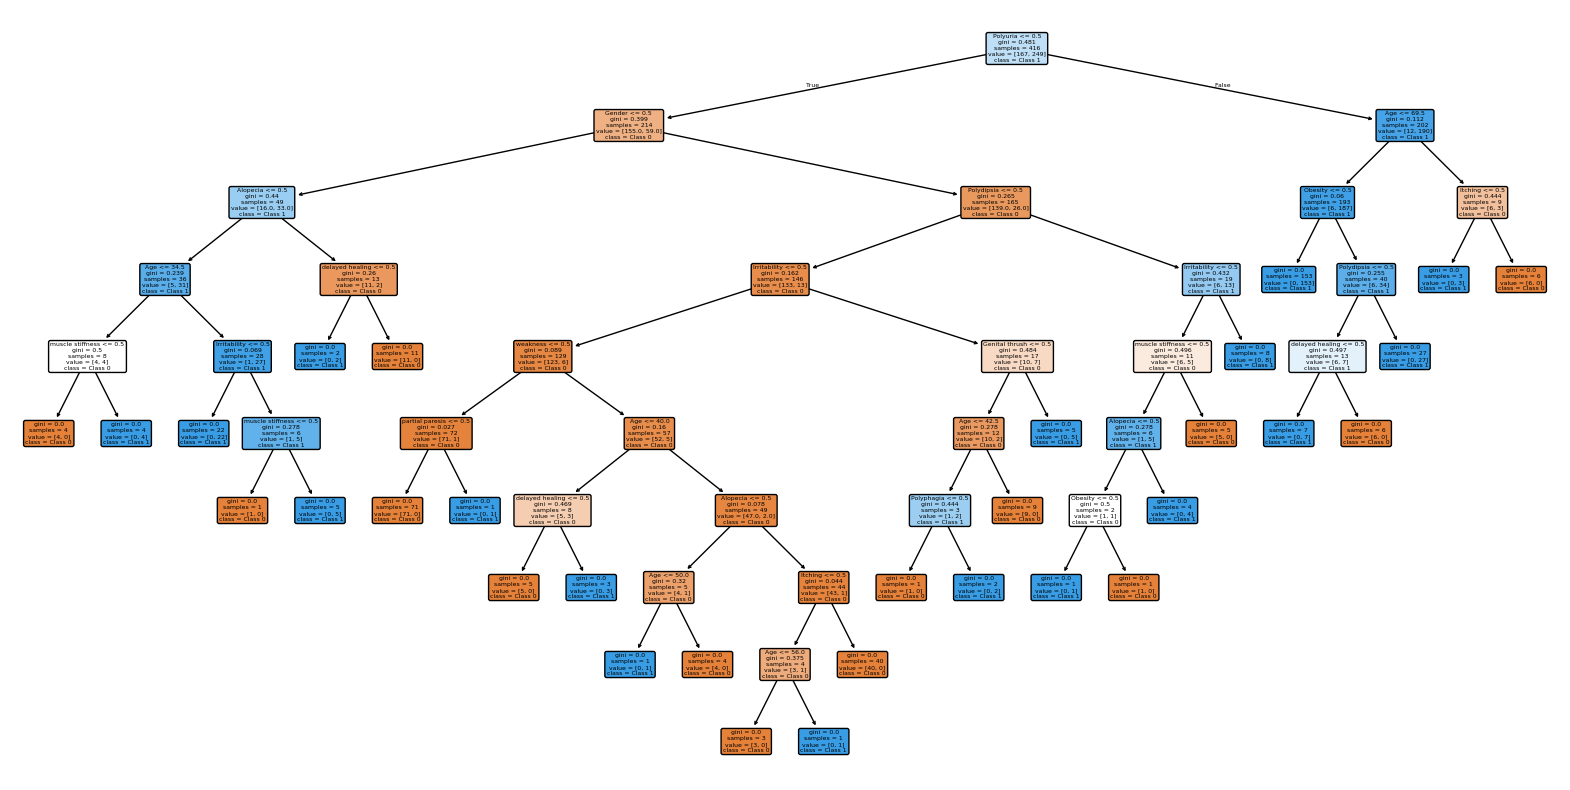

----------------------------------
chiều cao cây bằng 19
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



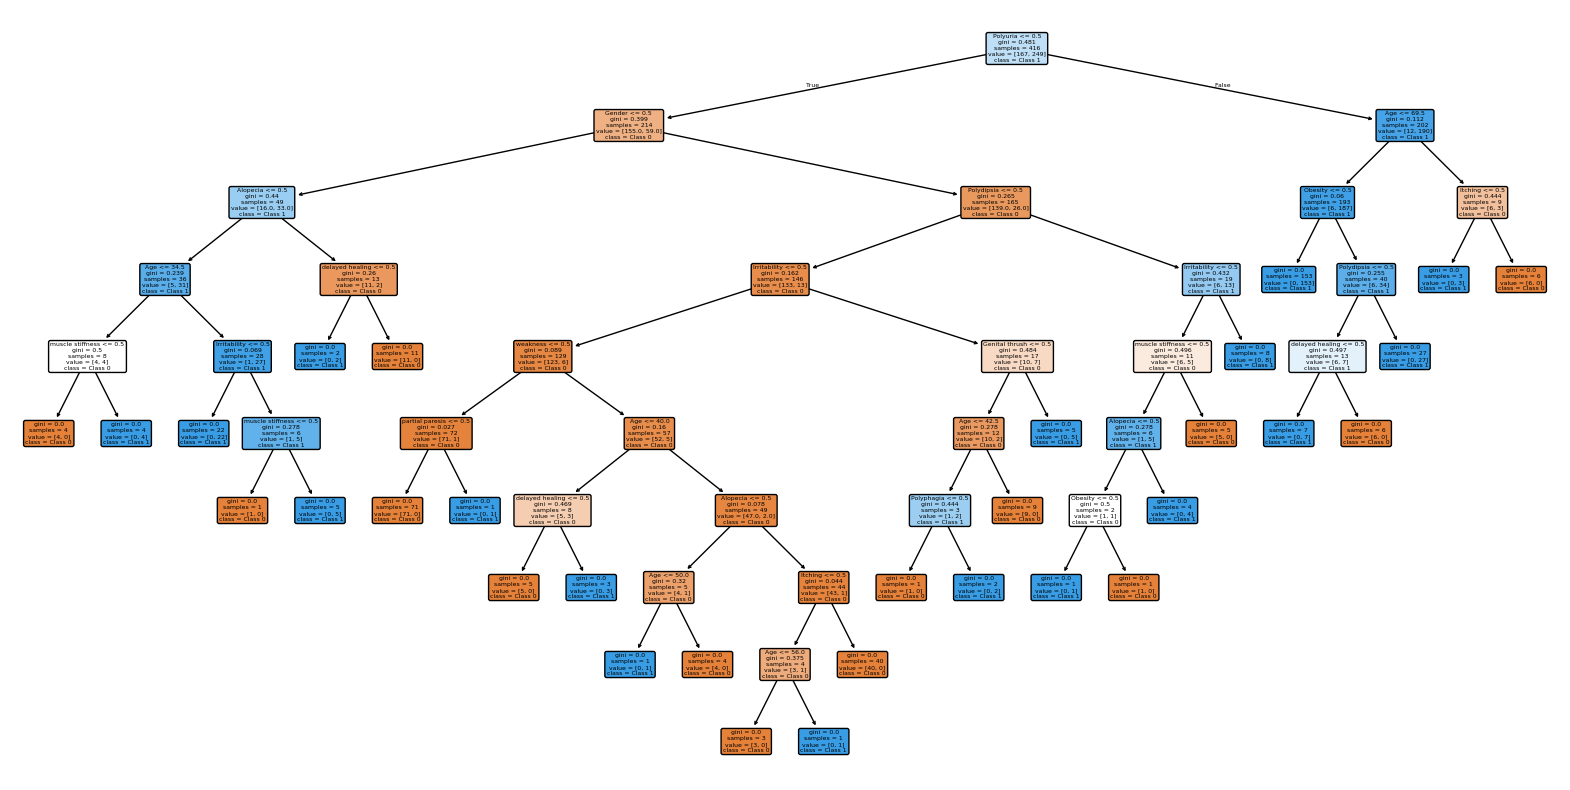

----------------------------------
chiều cao cây bằng 20
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



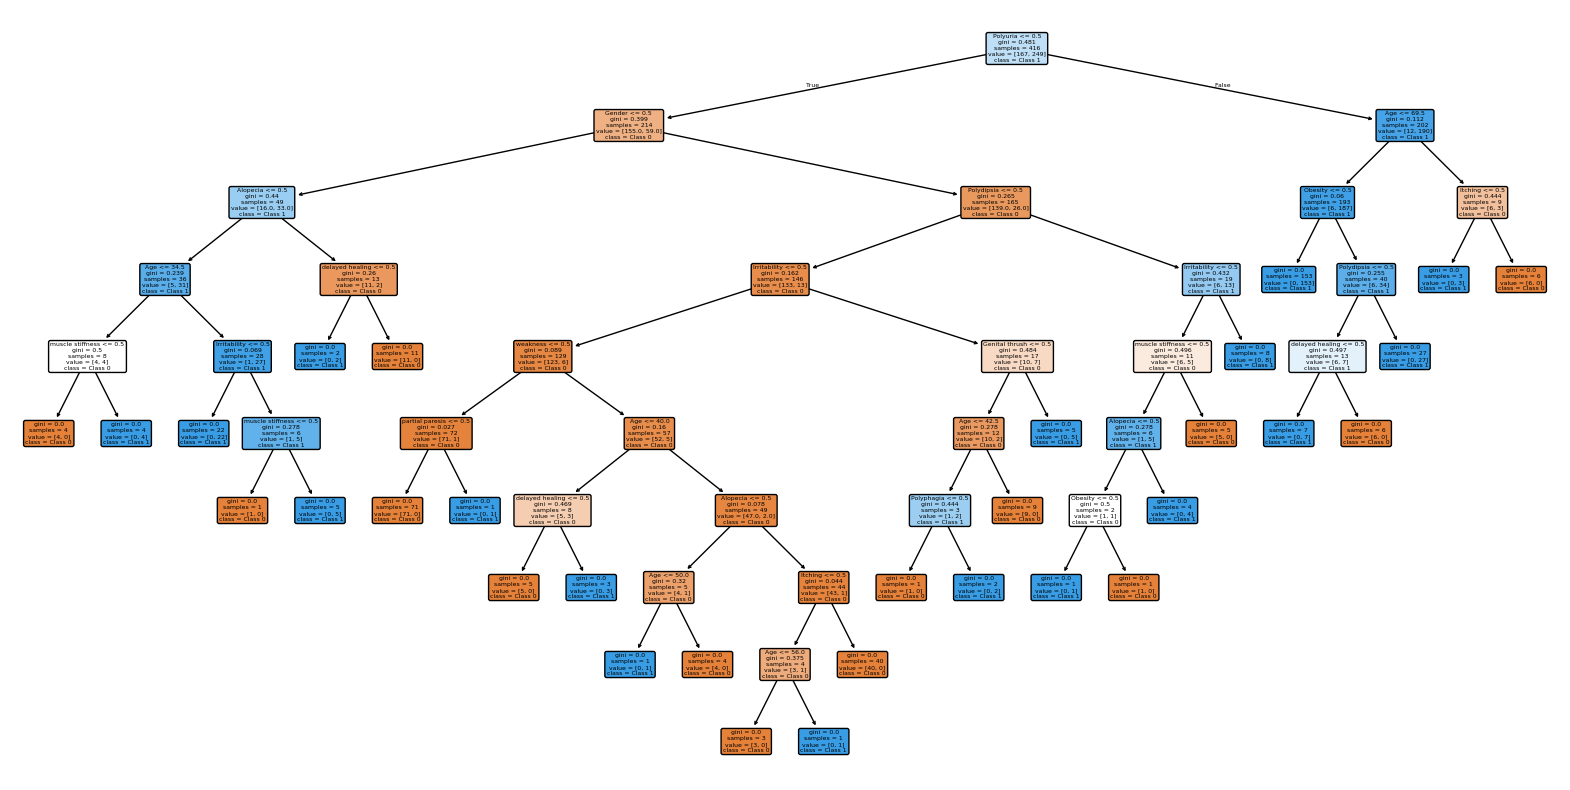

----------------------------------
-------------------------------- 
 Cây tốt nhất có chiều cao là 3:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



In [ ]:
max_recall_one = 0
index_max_recall_one = 3
for i in range(3,21)  :
    model_dt = DecisionTreeClassifier(random_state=42, max_depth=i)
    model_dt.fit(X_train, y_train)

    y_pred = model_dt.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred)
    conf_matrix_dt = confusion_matrix(y_test, y_pred)
    class_report_dt = classification_report(y_test, y_pred, output_dict=True)

    if class_report_dt['1']['recall'] > max_recall_one:
        max_recall_one = class_report_dt['1']['recall']
        index_max_recall_one = i
    print(f'chiều cao cây bằng {i}')
    class_report_dt = classification_report(y_test, y_pred)
    print(class_report_dt)
    plt.figure(figsize=(20,10))
    plot_tree(model_dt, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"], rounded=True)
    plt.show()
    print('----------------------------------')

model_dt = DecisionTreeClassifier(random_state=42, max_depth=index_max_recall_one)
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
conf_matrix_dt = confusion_matrix(y_test, y_pred)
class_report_dt = classification_report(y_test, y_pred)

print(f'-------------------------------- \n Cây tốt nhất có chiều cao là {index_max_recall_one}:')
print(class_report_dt)

Sử dụng random_forest


In [ ]:
df_rf = df
X = df_rf.drop('class', axis=1)
y = df_rf['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Classifier
model_rf = RandomForestClassifier(
    random_state=42,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100
)
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, random_state=42)

In [ ]:
y_pred = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)
class_report_rf = classification_report(y_test, y_pred)

print(class_report_rf)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.97      1.00      0.99        71

    accuracy                           0.98       104
   macro avg       0.99      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104



Sử dụng SVM